## Import all required libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns

## Import the data to workspace and then preview it

In [17]:
df = pd.read_csv("Train.csv")
df.head()

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1

### Checking imported data that have null data or not?

In [18]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

### Checking the size of the data

In [19]:
df.shape

(10999, 12)

### Listing all of the column names

In [20]:
all_column_name = df.columns
print(all_column_name)

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')


### Printing unique information of 'Mode_of_Shipment'

In [21]:
unique_shipping_method = df['Mode_of_Shipment'].unique()
print(unique_shipping_method)

['Flight' 'Ship' 'Road']


## Extracting the data of each 'Mode_of_Shipment' into flight, ship and road data and then preview the data

In [22]:
all_flight_data = df[df['Mode_of_Shipment']=='Flight']
all_ship_data = df[df['Mode_of_Shipment']=='Ship']
all_road_data = df[df['Mode_of_Shipment']=='Road']
print(all_flight_data.head())
print(all_ship_data.head())
print(all_road_data.head())

   ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233            

### From Research Hypothesis Question,  
Is different type of shipping method directly effect on the time of arrival?  
  
Checking by the data in column named "Reached.on.Time_Y.N", it is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

**Checking it by Hypothesis testing**  
Null Hypothesis (H0): The mode of shipment has no effect on the time arrival of the product to the customer  
Alternative Hypothesis (Ha): the mode of shipment affects the time delivery

[Text(0.5, 1.0, 'Count plot of number of product reach on time or not')]

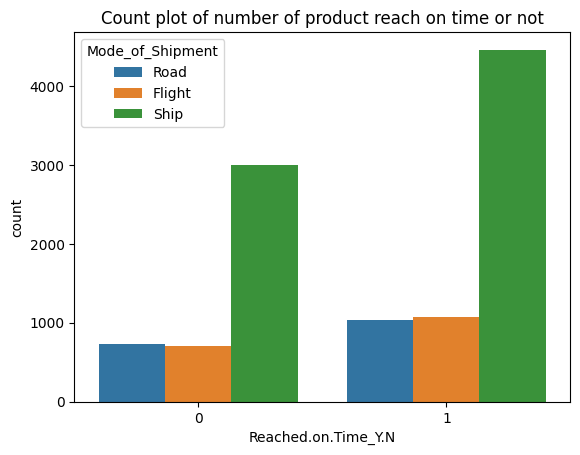

In [23]:
sns.countplot(x=df['Reached.on.Time_Y.N'], hue=df['Mode_of_Shipment']).set(title='Count plot of number of product reach on time or not')

### Checking the mean, median, mode and standard deviation of each mode of shipping data

In [24]:
print(all_flight_data['Reached.on.Time_Y.N'].describe())
print(all_ship_data['Reached.on.Time_Y.N'].describe())
print(all_road_data['Reached.on.Time_Y.N'].describe())

count    1777.000000
mean        0.601576
std         0.489711
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Reached.on.Time_Y.N, dtype: float64
count    7462.000000
mean        0.597561
std         0.490422
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Reached.on.Time_Y.N, dtype: float64
count    1760.000000
mean        0.588068
std         0.492323
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Reached.on.Time_Y.N, dtype: float64


### Using t-test to compare that there is no significantly difference in population mean between each of mode of shipment.

In [25]:
# Hypothesis Testing
from scipy import stats

alpha = 0.05
def print_hypothesis_result(test_name, p_value, alpha):
    print(f"\n{test_name}:")
    print(f"Null Hypothesis: {null_hypothesis}")
    print(f"Alternative Hypothesis: {alternative_hypothesis}")
    print(f"P-Value: {p_value:.4f}")
    
    if p_value < alpha/2 or p_value>1-alpha/2:
        print("Result: Reject Null Hypothesis")
    else:
        print("Result: Retain Null Hypothesis")

# Test 1: T-test to compare the average age between Pink Cab and Yellow Cab customers
null_hypothesis = "There is no significant difference in the average between 2 types of shipping method."
alternative_hypothesis = "There is a significant difference in the average between 2 types of shipping method."

flight_reached_on_time = all_flight_data['Reached.on.Time_Y.N']
ship_reached_on_time = all_ship_data['Reached.on.Time_Y.N']
road_reached_on_time = all_road_data['Reached.on.Time_Y.N']

t_stat_fs, p_value_fs = stats.ttest_ind(flight_reached_on_time, ship_reached_on_time)
t_stat_fr, p_value_fr = stats.ttest_ind(flight_reached_on_time, road_reached_on_time)
t_stat_sr, p_value_sr = stats.ttest_ind(ship_reached_on_time, road_reached_on_time)

print_hypothesis_result("T-test for on time", p_value_fs, alpha)
print_hypothesis_result("T-test for on time", p_value_fr, alpha)
print_hypothesis_result("T-test for on time", p_value_sr, alpha)


T-test for on time:
Null Hypothesis: There is no significant difference in the average between 2 types of shipping method.
Alternative Hypothesis: There is a significant difference in the average between 2 types of shipping method.
P-Value: 0.7564
Result: Retain Null Hypothesis

T-test for on time:
Null Hypothesis: There is no significant difference in the average between 2 types of shipping method.
Alternative Hypothesis: There is a significant difference in the average between 2 types of shipping method.
P-Value: 0.4134
Result: Retain Null Hypothesis

T-test for on time:
Null Hypothesis: There is no significant difference in the average between 2 types of shipping method.
Alternative Hypothesis: There is a significant difference in the average between 2 types of shipping method.
P-Value: 0.4655
Result: Retain Null Hypothesis


## Testing by One-way ANOVA to calculate the p-value in order to retain or reject the null hypothesis

In [26]:
# Add your code here
anova_p_value = stats.f_oneway(all_flight_data['Reached.on.Time_Y.N'],all_ship_data['Reached.on.Time_Y.N'],all_road_data['Reached.on.Time_Y.N'], axis=0)[1]
print(f"p-value is: {anova_p_value}")
print_hypothesis_result("ANOVA method", anova_p_value, alpha)
    

p-value is: 0.6896100162003029

ANOVA method:
Null Hypothesis: There is no significant difference in the average between 2 types of shipping method.
Alternative Hypothesis: There is a significant difference in the average between 2 types of shipping method.
P-Value: 0.6896
Result: Retain Null Hypothesis


## Degrees of freedom and variations calculation

In [27]:
#Concatenate pandas objects along a particular axis.
dataframe_ob=pd.concat([all_flight_data['Reached.on.Time_Y.N'],all_ship_data['Reached.on.Time_Y.N'],all_road_data['Reached.on.Time_Y.N']], axis=1)
dof_SSA=3-1
Num_Measurement_Group=np.zeros((3,1),dtype=np.int16)

for i in range(3):
    temp=dataframe_ob.values[:,i] #read values from ith column from dataframe
    temp2=temp[~np.isnan(temp)] #read values that are not nan
    Num_Measurement_Group[i,0]=len(temp2)
    
dof_SSW=np.sum(Num_Measurement_Group)-3
print('For among-group variation, degrees of freedom is', dof_SSA )
print('For within-group variation, degrees of freedom is', dof_SSW )

For among-group variation, degrees of freedom is 2
For within-group variation, degrees of freedom is 10996


In [28]:
# Calculate among-group and within-group variations.

#compute grand mean

Group=np.concatenate((all_flight_data['Reached.on.Time_Y.N'],all_ship_data['Reached.on.Time_Y.N'],all_road_data['Reached.on.Time_Y.N']), axis=None)
grand_mean=np.mean(Group)
SSA=0

for j in range(3):
    temp=dataframe_ob.values[:,j] #read values from ith column from dataframe
    temp2=temp[~np.isnan(temp)] #read values that are not nan
    SSA=SSA+Num_Measurement_Group[j,0]*(np.mean(temp2)-grand_mean)**2 #formula of SSA

SSW=0

for j in range(3):
    for i in range(Num_Measurement_Group[j,0]):
        temp=dataframe_ob.values[:,j] #read values from ith column from dataframe
        temp2=temp[~np.isnan(temp)] #read values that are not nan
        SSW=SSW+(temp2[i]-np.mean(temp2))**2 #formula of SSW

print('Among-group variation SSA is ', SSA)
print('Within-group variation SSW is ', SSW)

Among-group variation SSA is  0.1789084957709865
Within-group variation SSW is  2646.740629643816


## Critical region approach to testing hypothesis

Here's how to do a one-way ANOVA using the critical region approach:
Calculate the C-Value using the F-distribution with the degrees of freedom which we defined above and with 5% alpha as:

sts.f.ppf(0.95, dof_SSA, dof_SSW, loc=0, scale=1).

(SSA/dof_SSA) / (SSW/dof_SSW).

critical value is 2.9965485742051876
The test statistic is 0.37164159522546664
The test statistic is not in the critical region, null hypothesis is retained 


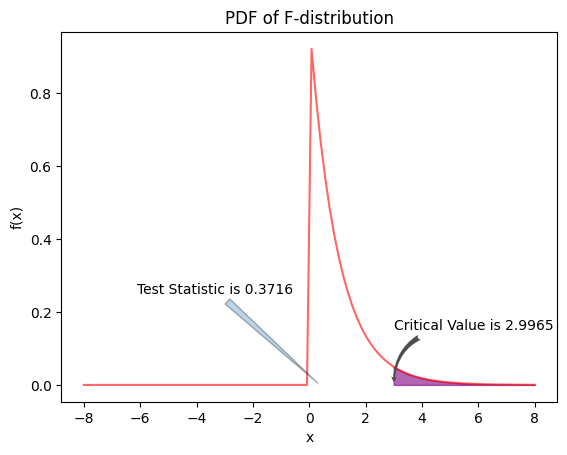

In [29]:
# Critical Value

x = np.linspace(-8, 8, 100)
plt.plot(x, sts.f.pdf(x,dof_SSA, dof_SSW,loc=0, scale=1), 'r-', alpha=0.6)
plt.title('PDF of F-distribution')
plt.ylabel('f(x)')
plt.xlabel('x')

C_value=sts.f.ppf(0.95, dof_SSA, dof_SSW, loc=0, scale=1)
print('critical value is', C_value)

x2= np.linspace(C_value,8, 100)
plt.fill_between(x2, sts.f.pdf(x2,dof_SSA, dof_SSW,loc=0, scale=1), color='purple',alpha=0.6)
plt.annotate(f'Critical Value is {round(C_value,4)}',(C_value,0),(C_value,0.15),arrowprops=dict(arrowstyle="fancy",
    fc="0.3", ec="none",
    connectionstyle="angle3,angleA=0,angleB=-90"))


# compute test statistic for one-way ANOVA
test_statistic_value=(SSA/dof_SSA) / (SSW/dof_SSW)
print('The test statistic is', test_statistic_value)
plt.annotate(f'Test Statistic is {round(test_statistic_value,4)}',(test_statistic_value,0),(test_statistic_value-6.5,0.25),arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.3))
print('The test statistic is not in the critical region, null hypothesis is retained ')